# Что делать

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [92]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv(
    'ДЗ/tmdb_5000_movies.csv')
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [111]:
#изучим данные
df.head (1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087


# Построим столбчатую диаграмму распределения 15 фильмов с самой большой выручкой

<BarContainer object of 15 artists>

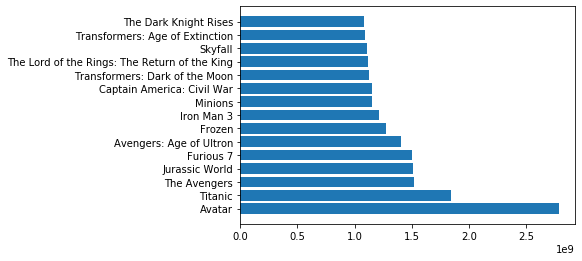

In [37]:
revenue_movies_barh = df.sort_values('revenue', ascending=False).head(15)
plt.barh(revenue_movies_barh['title'], names_barh['revenue'])


Как видим, самую большую кассу собрал Аватар

# Пострим график, показывающий бюджет и кассовые сборы фильмов в зависимости от языка

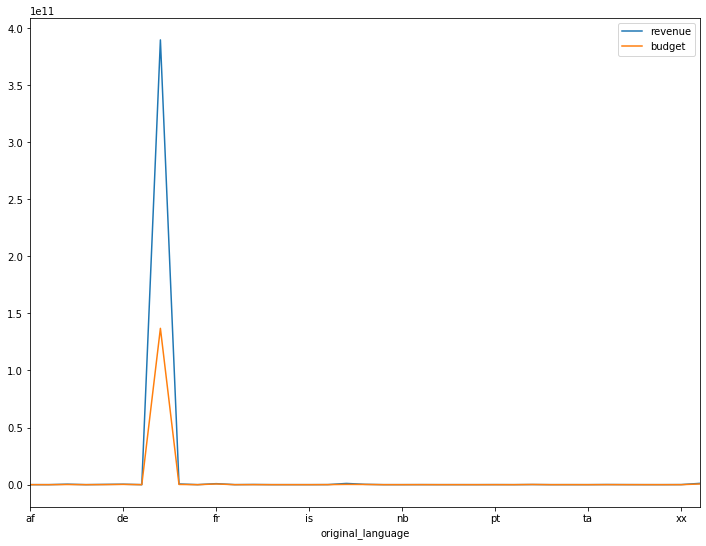

In [121]:
df1 = df[['original_language']+['revenue']+['budget']]
df4 = df1.groupby('original_language').sum()
#df4.head()
df4.plot()

По графику можно сделать вывод, что данных недостаточно: есть данные по фильмам на аглийском языке и нет данных по фильмам на других языках.

# Посмотрим, как между собой связаны бюджет, кассовые сборы и прибыль

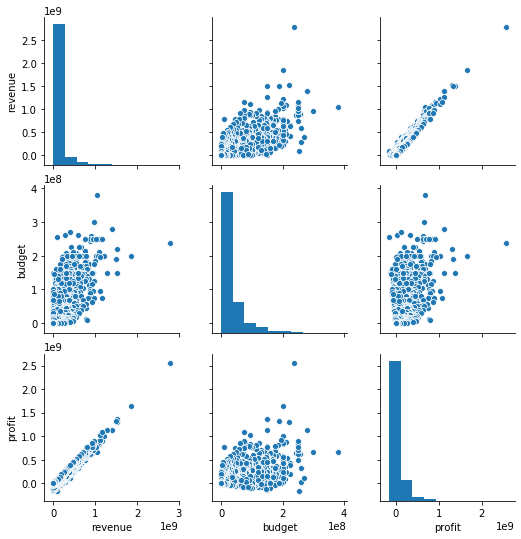

In [110]:
df['profit']=df['revenue']-df['budget']
sns_plot = sns.pairplot(
    df[['revenue','budget','profit']])
sns_plot

Существует сильная корреляция между кассовыми сборами и прибылью (чем выше кассовые сборы, тем больше прибыль). При этом нельзя однозначно сказать, что чем больше потраченный бюджет, тем выше кассовые сборы.  

# Посмотрим, какие оценки в основном ставят зрители

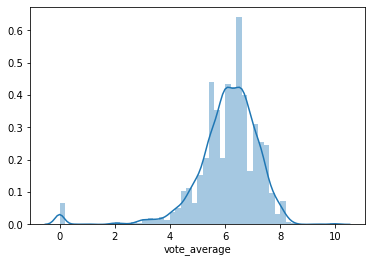

In [77]:
sns.distplot(df.vote_average)

Большинство оценок находится в диапозоне от 4 до 8, при этом самая часто выставляемая оценка - примерно 6,5.

# Посмотрим на то, как связаны между собой кассовые сборы и оценки зрителей

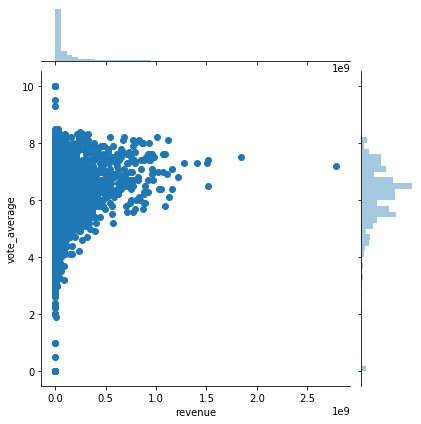

In [79]:
sns.jointplot(x='revenue', y='vote_average', 
              data=df, kind='scatter')

Нет прямой связи между кассовыми сборами и оценками зителей. Так, самая высокие оценки выставляют фильмам с самыми маленькими кассовыми сборами